In [1]:
import pandas as pd
from pandas_datareader import data as web
import datetime
import urllib
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from pyramid.arima import auto_arima
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [3]:
# We will look at stock prices over the past year, starting at January 1, 2015
start = datetime.datetime(2015,1,1)

# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start)

In [4]:
type(apple)

pandas.core.frame.DataFrame

In [5]:
apple.shape

(1240, 6)

In [6]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.454300
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.624336
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.633545
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,99.002556
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.806480


In [7]:
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-27,267.980011,265.309998,265.579987,267.839996,16308900.0,267.839996
2019-11-29,268.000000,265.899994,266.600006,267.250000,11654400.0,267.250000
2019-12-02,268.250000,263.450012,267.269989,264.160004,23621800.0,264.160004
2019-12-03,259.529999,256.290009,258.309998,259.450012,28607600.0,259.450012
2019-12-04,263.309998,260.679993,261.070007,261.739990,16795400.0,261.739990


In [8]:
apple.to_csv('apple.csv',index=True)

In [9]:
df = pd.read_csv('apple.csv')

In [10]:
# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

         Date        High         Low        Open       Close      Volume  \
0  2015-01-02  111.440002  107.349998  111.389999  109.330002  53204600.0   
1  2015-01-05  108.650002  105.410004  108.290001  106.250000  64285500.0   
2  2015-01-06  107.430000  104.629997  106.540001  106.260002  65797100.0   
3  2015-01-07  108.199997  106.699997  107.199997  107.750000  40105900.0   
4  2015-01-08  112.150002  108.699997  109.230003  111.889999  59364500.0   

    Adj Close  
0  100.454300  
1   97.624336  
2   97.633545  
3   99.002556  
4  102.806480  

 Shape of the data:
(1240, 7)


In [11]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [12]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [13]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [14]:

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [15]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(987, 2)


In [16]:
# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(253, 2)


In [17]:
# In the next step, we will create predictions for the validation set
# and check the RMSE using the actual values.

# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [18]:
# checking the results (RMSE value)

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
28.63752856488598


/Users/Srivats6696/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Srivats6696/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


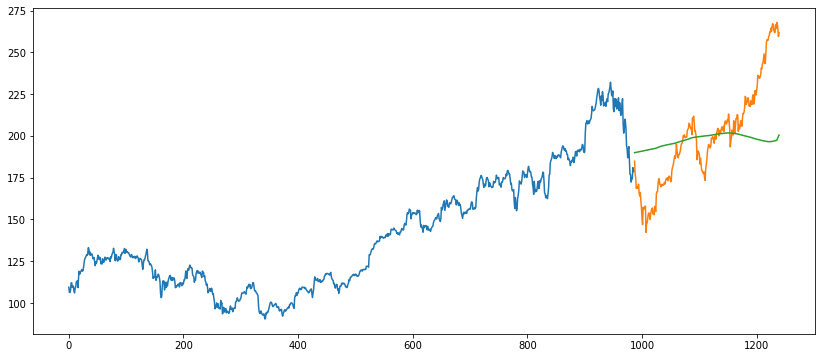

In [19]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

plt.figure(figsize=(14,6))

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

The RMSE value is close to 190 but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).



In the next section, we will look at two commonly used machine learning techniques – Linear Regression and kNN, and see how they perform on our stock market data.

# Linear Regression

In [20]:
# #setting index as date values
# df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
# df.index = df['Date']

# #sorting
# data = df.sort_index(ascending=True, axis=0)

# #creating a separate dataset
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

# for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Close'][i] = data['Close'][i]

In [21]:
# from structured import *

def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

We are going to create features like 

‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’.

In [22]:
#create features

add_datepart(new_data, 'Date',drop=True)
new_data.drop('Elapsed', axis=1, inplace=True) 

#elapsed will be the time stamp

In [23]:
# new_data['mon_fri'] = 0
# for i in range(0,len(new_data)):
#     if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
#         new_data['mon_fri'][i] = 1
#     else:
#         new_data['mon_fri'][i] = 0

In [24]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,109.33,2015,1,1,2,4,2,False,False,False,False,False,False
1,106.25,2015,1,2,5,0,5,False,False,False,False,False,False
2,106.26,2015,1,2,6,1,6,False,False,False,False,False,False
3,107.75,2015,1,2,7,2,7,False,False,False,False,False,False
4,111.89,2015,1,2,8,3,8,False,False,False,False,False,False


We will now split the data into train and validation sets to check the performance of the model.

In [25]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#make predictions and find the rmse

preds_LR = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds_LR)),2)))
rms

177.1974996289641

The RMSE value is approximately the same as the technique, which clearly shows that linear regression has performed poorly. 



/Users/Srivats6696/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Srivats6696/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 0, '')

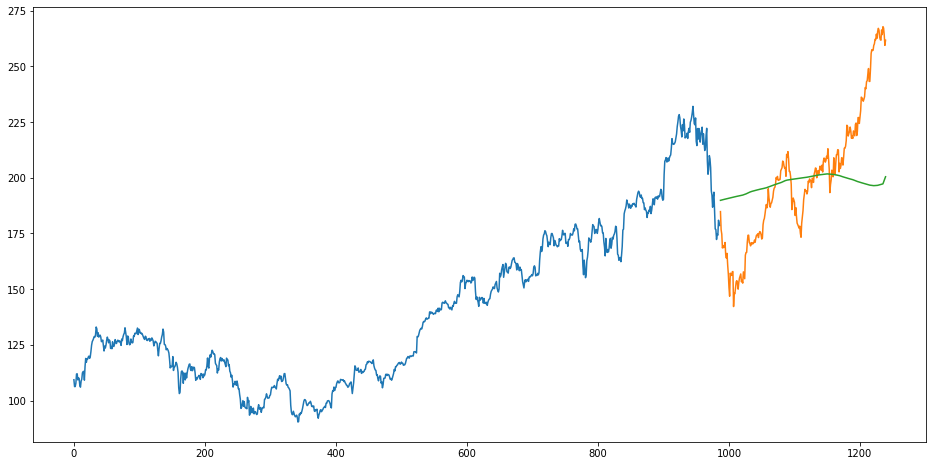

In [27]:
#plot

plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('')

Linear regression is a simple technique and quite easy to interpret, but there are a few obvious disadvantages.

One problem in using regression algorithms is that the model overfits to the date and month column. 

Instead of taking into account the previous values from the point of prediction,the model will consider the value from the same date a month ago, or the same date/month a year ago.

# k-Nearest Neighbours

Based on the independent variables, kNN finds the similarity between new data points and old data points.

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))

using the same data for training and validation from previous algorithms 

In [29]:
#scaling data

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions

model.fit(x_train,y_train)
preds_KNN = model.predict(x_valid)

/Users/Srivats6696/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
preds_KNN.size

253

In [31]:
#rmse

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

28.63752856488598

/Users/Srivats6696/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Srivats6696/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


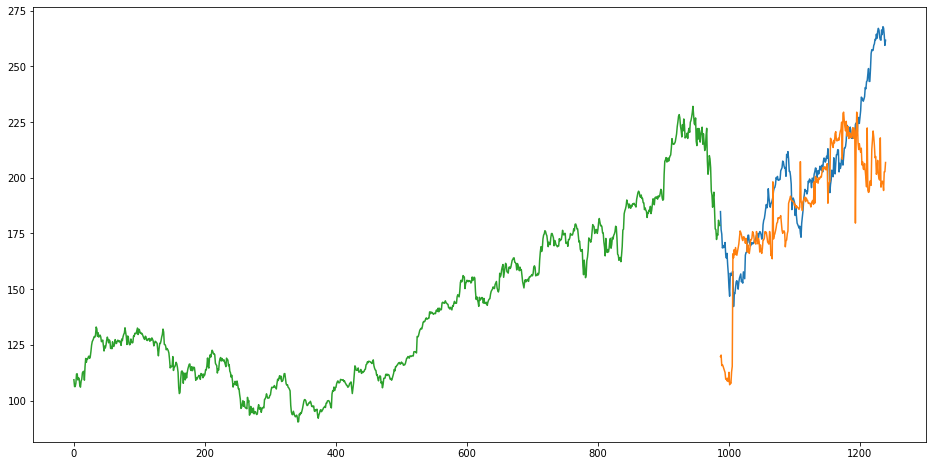

In [32]:
#plot

plt.figure(figsize=(16,8))
valid['Predictions'] = 0
valid['Predictions'] = preds_KNN
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [33]:
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-27,267.980011,265.309998,265.579987,267.839996,16308900.0,267.839996
2019-11-29,268.000000,265.899994,266.600006,267.250000,11654400.0,267.250000
2019-12-02,268.250000,263.450012,267.269989,264.160004,23621800.0,264.160004
2019-12-03,259.529999,256.290009,258.309998,259.450012,28607600.0,259.450012
2019-12-04,263.309998,260.679993,261.070007,261.739990,16795400.0,261.739990


In [34]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.454300
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.624336
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.633545
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,99.002556
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.806480


We can safely say that regression algorithms have not performed well on this dataset.

# Time Series and Seasonality Using Prophet 

In [1]:
# from fbprophet import Prophet

In [36]:
apple[666:700]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-24,160.740005,158.550003,160.429993,159.270004,19818900.0,154.037735
2017-08-25,160.559998,159.270004,159.649994,159.860001,25480100.0,154.608353
2017-08-28,162.000000,159.929993,160.139999,161.470001,25966000.0,156.165451
2017-08-29,163.119995,160.000000,160.100006,162.910004,29516900.0,157.558167
2017-08-30,163.889999,162.610001,163.800003,163.350006,27269600.0,157.983704
2017-08-31,164.520004,163.479996,163.639999,164.000000,26785100.0,158.612350
2017-09-01,164.940002,163.630005,164.800003,164.050003,16591100.0,158.660706
2017-09-05,164.250000,160.559998,163.750000,162.080002,29468500.0,156.755432
2017-09-06,162.990005,160.520004,162.710007,161.910004,21651700.0,156.590988


In [ ]:
new_data= apple

In [ ]:
# #creating dataframe

# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

# for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Close'][i] = data['Close'][i]

# new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
# new_data.index = new_data['Date']

# #preparing data

# new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

# #train and validation

# train = new_data[:987]
# valid = new_data[987:]

#fit the model

model = Prophet()
model.fit(train)

In [ ]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

# LSTM 

In [ ]:

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

In [ ]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])